### Legend
- satisfaction_level - Уровень удовлетворенности работой
- last_evaluation - Время с момента последней оценки в годах
- number_projects - Количество проектов, выполненных за время работы
- average_monthly_hours - Среднее количество часов на рабочем месте в месяц
- time_spend_company - Стаж работы в компании в годах
- work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
- left - уволился ли сотрудник
- promotion_last_years - повышался ли сотрудник за последние пять лет
- department - отдел в котором работает сотрудник
- salary - относительный уровень зарплаты

In [1]:
import pandas as pd
import seaborn as sns
from pandas.api.types import CategoricalDtype
from IPython.core.display import display, HTML
from pylab import rcParams
rcParams['figure.figsize'] = 14,7
display(HTML("<style>.container { width:85% !important; }</style>"))

# TODO: сделать нормальные графики, все в одном стиле, с нормальными подписями
# 1. Загрузка

In [2]:
df = pd.read_csv('D:/Ds_Data_sets/HR.csv', dtype = {'left':'category', 'Work_accident':'category', 'promotion_last_5years':'category'})
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df['salary'].astype(CategoricalDtype(['low','medium','high'], ordered = True), copy = False)

0           low
1        medium
2        medium
3           low
4           low
          ...  
14994       low
14995       low
14996       low
14997       low
14998       low
Name: salary, Length: 14999, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  int64   
 3   average_montly_hours   14999 non-null  int64   
 4   time_spend_company     14999 non-null  int64   
 5   Work_accident          14999 non-null  category
 6   left                   14999 non-null  category
 7   promotion_last_5years  14999 non-null  category
 8   department             14999 non-null  object  
 9   salary                 14999 non-null  object  
dtypes: category(3), float64(2), int64(3), object(2)
memory usage: 864.5+ KB


In [5]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

# 2. Основные статистики

In [6]:
df.describe(include = 'all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999,14999,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,10,3
top,NaN,NaN,NaN,NaN,NaN,0,0,0,sales,low
freq,NaN,NaN,NaN,NaN,NaN,12830,11428,14680,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,NaN,NaN,NaN,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,NaN,NaN,NaN,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,NaN,NaN,NaN,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,NaN,NaN,NaN,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,NaN,NaN,NaN,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Распределение всех сотрудников по отделам'}, ylabel='количество сотрудников'>

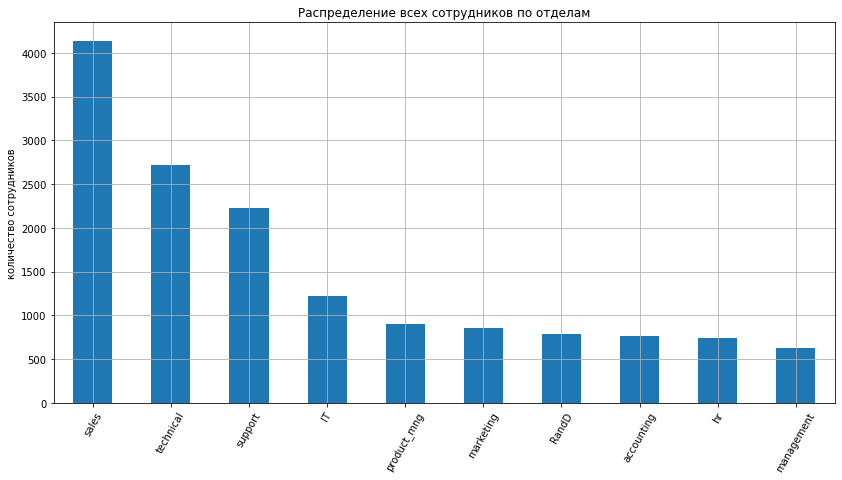

In [37]:
df['department'].value_counts().plot(kind = 'bar', rot = 60, grid = True, 
                                     ylabel = 'количество сотрудников', title = 'Распределение всех сотрудников по отделам')

#TODO в распределение включить визуализацию уволился/не уволился (два цвета с накоплением)

<AxesSubplot:title={'center':'распределение сотрудников по зарплате'}, ylabel='количество сотрудников'>

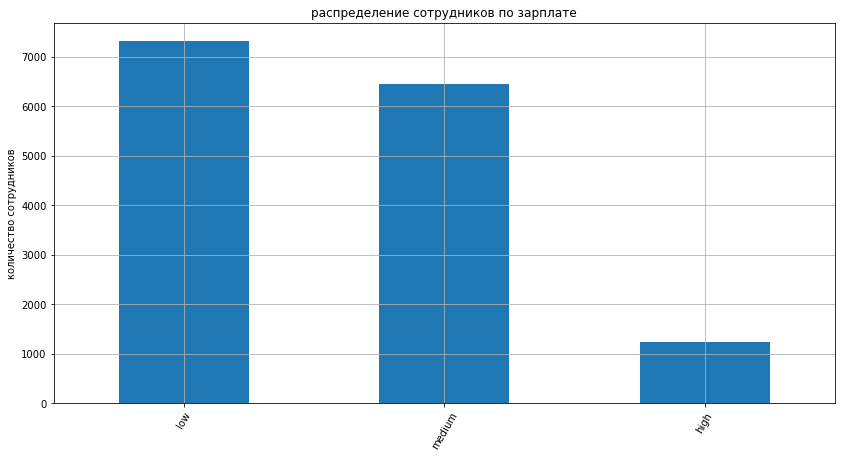

In [39]:
df['salary'].value_counts().plot(kind = 'bar', rot = 60, grid = True, 
                                 ylabel = 'количество сотрудников', title='распределение сотрудников по зарплате')

#TODO в распределение включить визуализацию количество сотрудников, в тч по зарплате (3 цвета с накоплением)

<AxesSubplot:title={'center':'распределение сотрудников по времени с последней оценки'}, xlabel='время с последней оценки, годы', ylabel='количество сотрудников'>

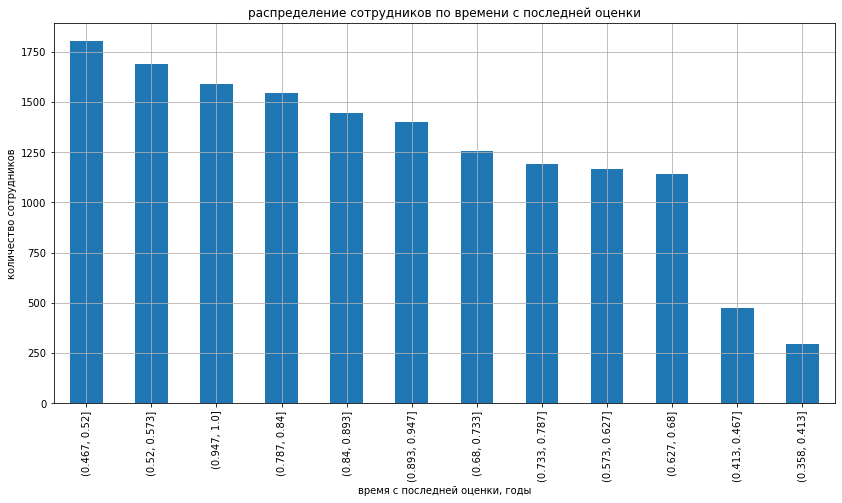

In [49]:
df['last_evaluation'].value_counts(bins = 12, ascending = False).plot(kind = 'bar', grid = True, 
                                    xlabel = 'время с последней оценки, годы', ylabel = 'количество сотрудников', title='распределение сотрудников по времени с последней оценки')

#TODO сделать полезный график, например, узнать в каком отделе недавно прошла аттестация

<AxesSubplot:title={'center':'Распределение сотрудников по количеству проектов'}, xlabel='количество проектов у сотрдуника', ylabel='количество сотрудников'>

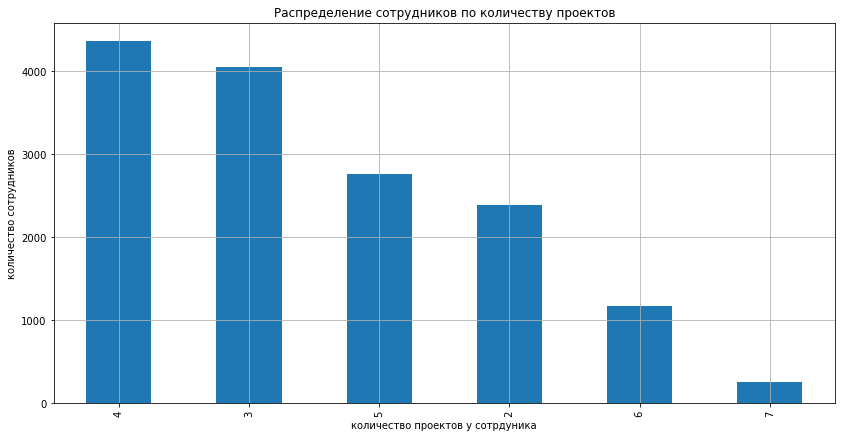

In [51]:
df['number_project'].value_counts().plot(kind = 'bar', grid = True, 
                                      xlabel='количество проектов у сотрдуника', ylabel = 'количество сотрудников', title='Распределение сотрудников по количеству проектов')

#TODO добавить инфу о зарплате, о подразделении

# 3. Корреляция

Самые скоррелированные переменные: `average_montly_hours` и `number_project`

Наименее скоррелированные: `satisfaction_level` и `average_montly_hours`

In [11]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


<AxesSubplot:>

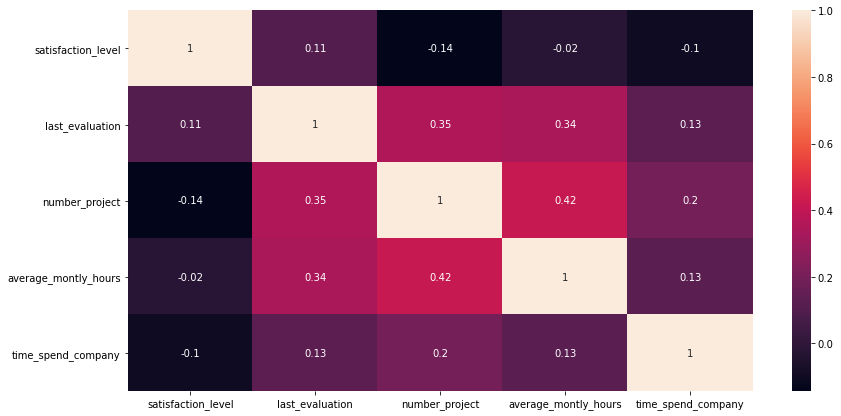

In [12]:
sns.heatmap(df.corr(),annot = True)

<AxesSubplot:title={'center':'average_montly_hours'}, xlabel='number_project'>

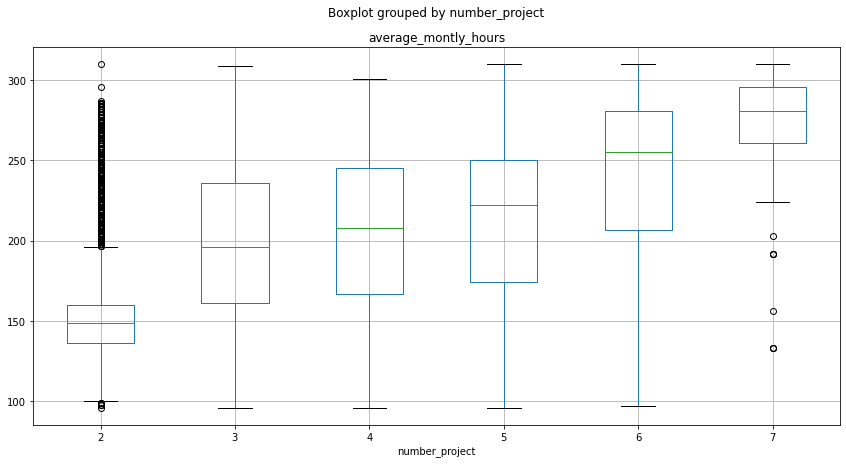

In [54]:
#корреляция присутствует
df.boxplot('average_montly_hours',by='number_project')
#Больше среднее количество часов в месяц на работе - больше проектов

#TODO НАдписи на кириллице, вооще использовать seaborn

<AxesSubplot:title={'center':'last_evaluation'}, xlabel='number_project'>

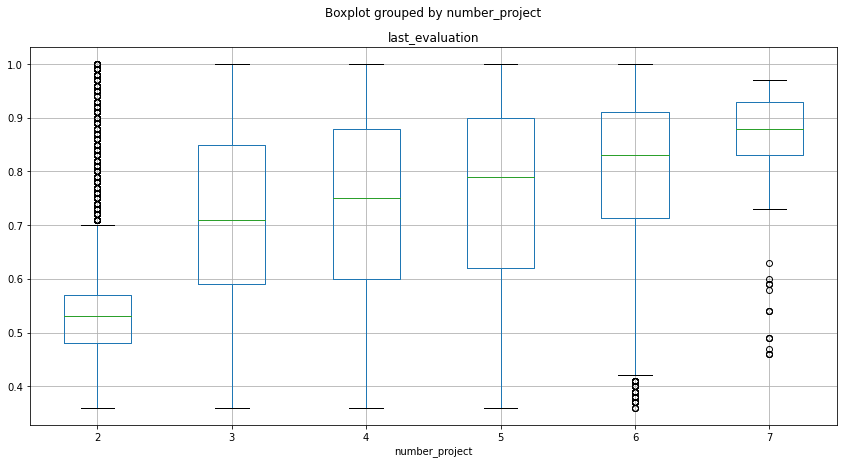

In [55]:
#корреляция присутствует слабо
df.boxplot('last_evaluation',by='number_project')

#TODO другой график, зерня какая то, зачем он тут

<AxesSubplot:xlabel='last_evaluation', ylabel='average_montly_hours'>

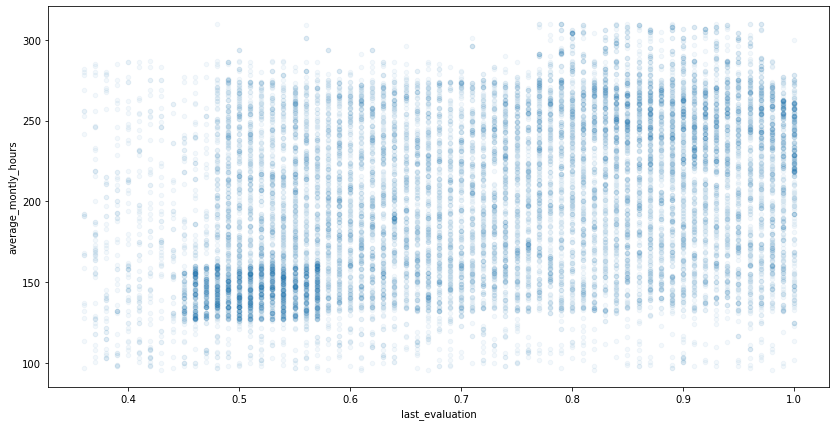

In [15]:
#есть предположение что last_evaluetion и average_montly_hours также коррелируют
df.plot.scatter(x = 'last_evaluation', y='average_montly_hours', alpha = 0.05)
#корреляции нет

# 4. Количество сотрудников, работающих в каждом департаменте

In [16]:
#Работает - в настоящее время
df[df['left'] != '1']['department'].value_counts()

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: department, dtype: int64

# 5. Распределение сотрудников по зарплатам (график)

<AxesSubplot:title={'center':'Распределение сотрудников по зарплатам'}, xlabel='salary', ylabel='employee count'>

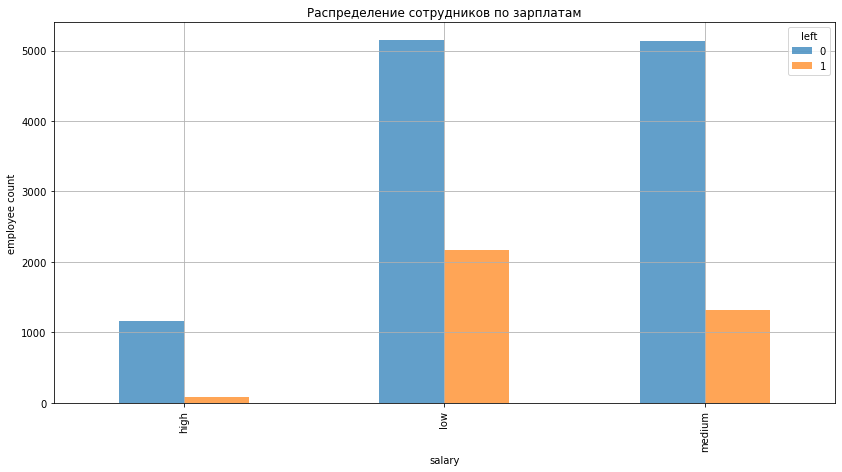

In [17]:
df.pivot_table(index = 'salary', columns = 'left', values = 'number_project', aggfunc = 'count').plot(
     kind = 'bar',alpha = 0.7, grid = True, ylabel = 'employee count', 
    title = 'Распределение сотрудников по зарплатам')

# 6.  Распределение сотрудников по зарплатам в каждом департаменте (график)

<AxesSubplot:title={'center':'Распределение сотрудников по зарплатам в отделах'}, xlabel='department', ylabel='количество сотрудников'>

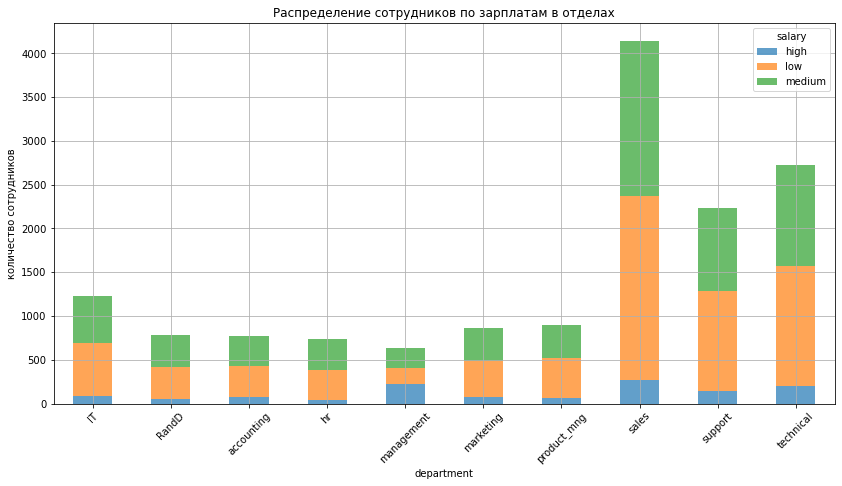

In [57]:
# Считаются только работающие сотрудники
df.pivot_table(index = 'department', columns = 'salary', values = 'number_project', aggfunc = 'count').plot(
     kind = 'bar',stacked=True,alpha = 0.7, grid = True, ylabel = 'количество сотрудников', 
    title = 'Распределение сотрудников по зарплатам в отделах', rot = 45)

#TODO сделать нормальный порядок следования зп высокая-средняя-низкая

<AxesSubplot:xlabel='left,department,salary'>

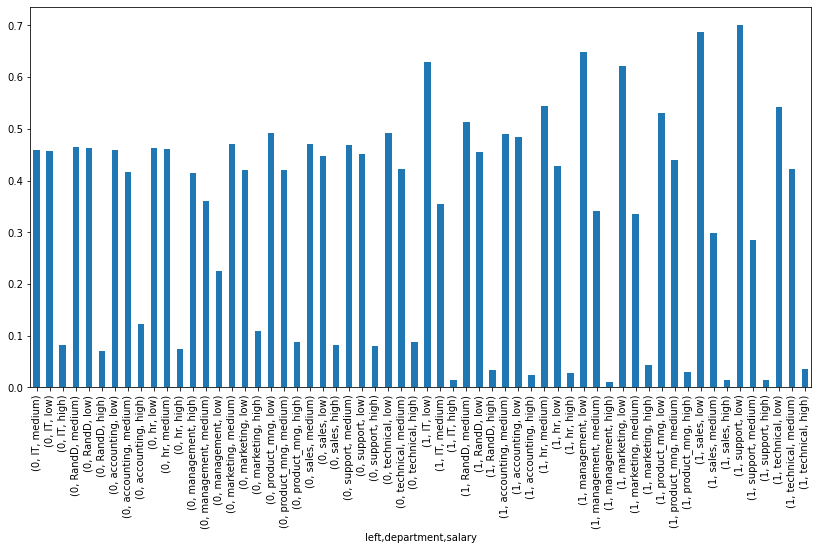

In [58]:
#Приведем в относительные величины для каждого департамента
df.groupby(['left', 'department'])['salary'].value_counts(normalize = True).plot(kind = 'bar')

#TODO переделать или удалить, непонятно ничего

# 7. Проверить гипотезу
Сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

## Вывод: гипотеза отвергается

In [20]:
from scipy import stats as st

#H0: рабочее время сотрудников с высоким окладом меньше или равно рабочему времени сотрудников с низким окладом
#H1: рабочее время сотрудников с высоким окладом больше рабочего времени сотрудников с низким окладом

#Т-критерий Стьюдента для несвязных выборок
#Уровень значимости 0,05

alpha = 0.05
high_sal_time = pd.Series(df[df['salary'] == 'high']['average_montly_hours'])
low_sal_time = pd.Series(df[df['salary'] == 'low']['average_montly_hours'])

In [21]:
high_sal_time.describe()

count    1237.000000
mean      199.867421
std        47.710446
min        96.000000
25%       161.000000
50%       199.000000
75%       241.000000
max       307.000000
Name: average_montly_hours, dtype: float64

In [22]:
low_sal_time.describe()

count    7316.000000
mean      200.996583
std        50.832214
min        96.000000
25%       155.000000
50%       199.000000
75%       246.000000
max       310.000000
Name: average_montly_hours, dtype: float64

<AxesSubplot:>

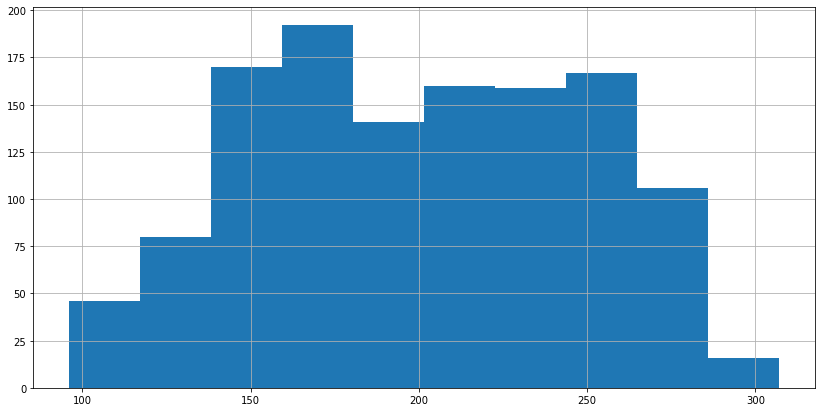

In [23]:
#форма распределения
high_sal_time.hist()

<AxesSubplot:>

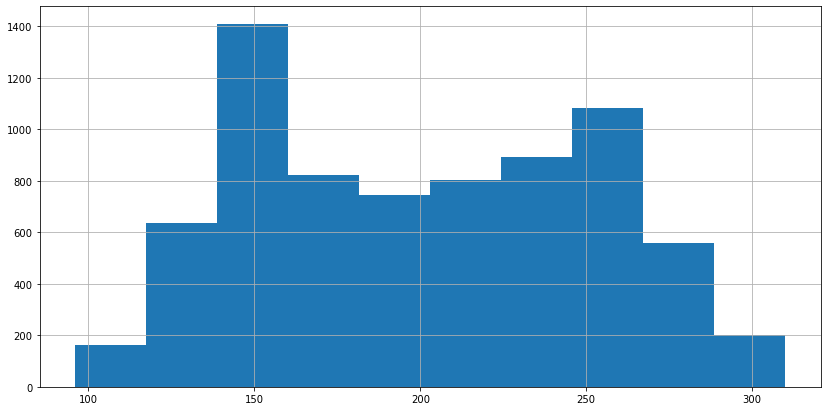

In [24]:
##форма распределения
low_sal_time.hist()

In [25]:
res = st.ttest_ind(high_sal_time, low_sal_time, equal_var = False, alternative = 'greater')
print(res)

if res.pvalue < alpha:
    print('отвергаем нулевую гипотезу, время сотрудников с высокими зп выше чем с низкими')
else:
    print('принимаем нулевую гипотезу, время сотрудников с высокими зп меньше или равно времени с низкими')

Ttest_indResult(statistic=-0.7624331665385475, pvalue=0.7770477228871056)
принимаем нулевую гипотезу, время сотрудников с высокими зп меньше или равно времени с низкими


# 8. Расчет показателей среди уволившихся и не уволившихся сотрудников:
- Доля сотрудников с повышением за последние 5 лет
- Средняя степень удовлетворенности
- Среднее количество проектов

In [26]:
#Повышение за последние 5 лет
df.groupby(['left','promotion_last_5years'])['salary'].count()

left  promotion_last_5years
0     0                        11128
      1                          300
1     0                         3552
      1                           19
Name: salary, dtype: int64

<AxesSubplot:title={'center':'Распределение сотрудников с повышением последние 5 лет'}, xlabel='left', ylabel='employee count'>

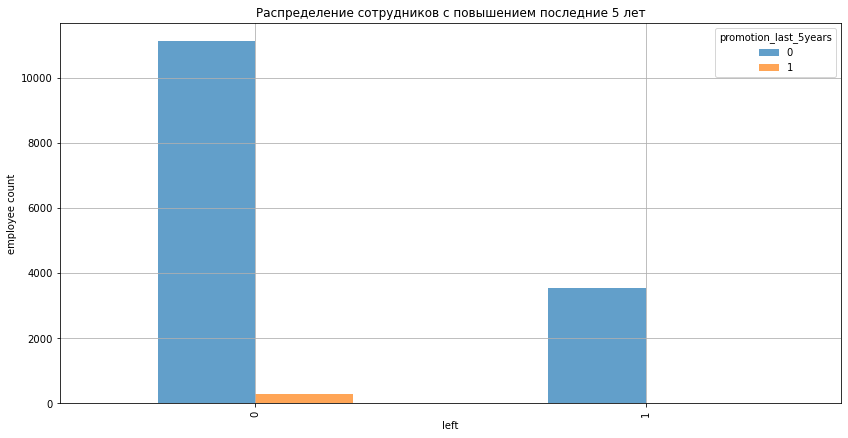

In [27]:
#для наглядности график
df.pivot_table(index = 'left', columns = 'promotion_last_5years', values = 'salary', aggfunc = 'count').plot(
     kind = 'bar',alpha = 0.7, grid = True, ylabel = 'employee count', 
    title = 'Распределение сотрудников с повышением последние 5 лет')

#Вывод: все уволившиеся сотрудники не имели повышения в течение последних 5 лет

In [28]:
#Степень удовлетворенности в %
df.groupby('left')['satisfaction_level'].mean()*100

#TODO: как то сделать нормальные подписи к данным

left
0    66.680959
1    44.009801
Name: satisfaction_level, dtype: float64

<AxesSubplot:title={'center':'satisfaction_level'}, xlabel='left'>

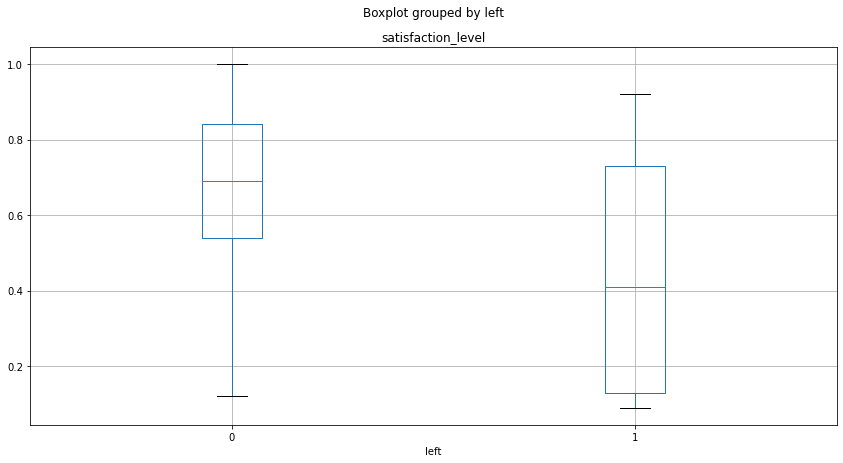

In [29]:
#подробная картина
df.boxplot('satisfaction_level', by = 'left')

#Вывод: уволившиеся сотрудники были в среднем (медиана) менее удовлетворены работой. Стоит отметить, что среди уволившихся были и вполне удовлетворенне работой.

#TODO: попробовать использовать две гистограммы или виолончели

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

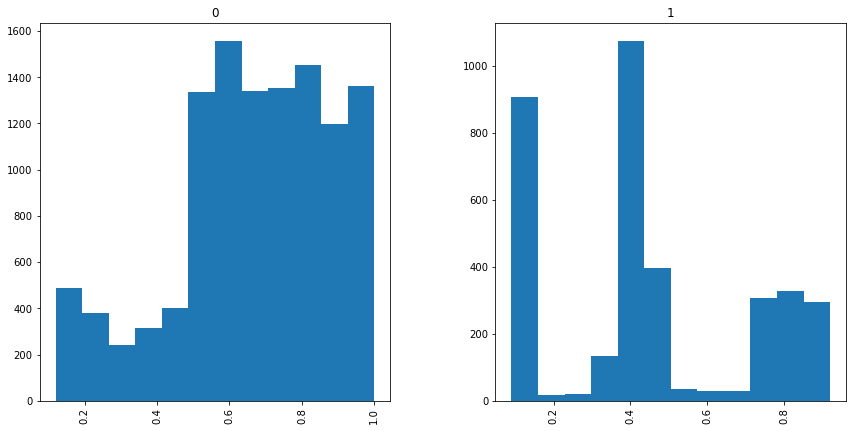

In [62]:
#Для наглядности используем гистограмму
df.hist('satisfaction_level', by = 'left', bins = 12)

#TODO: перевести в относительные величины, график в виде "сколько сотрудников поставили оценку меншше или равно x", сделать нормальные подписи

In [31]:
#Среднее количество проектов
df.groupby('left')['number_project'].mean()

left
0    3.786664
1    3.855503
Name: number_project, dtype: float64

<AxesSubplot:title={'center':'Распределение сотрудников по количеству проектов'}, xlabel='number_project', ylabel='relativity employee count'>

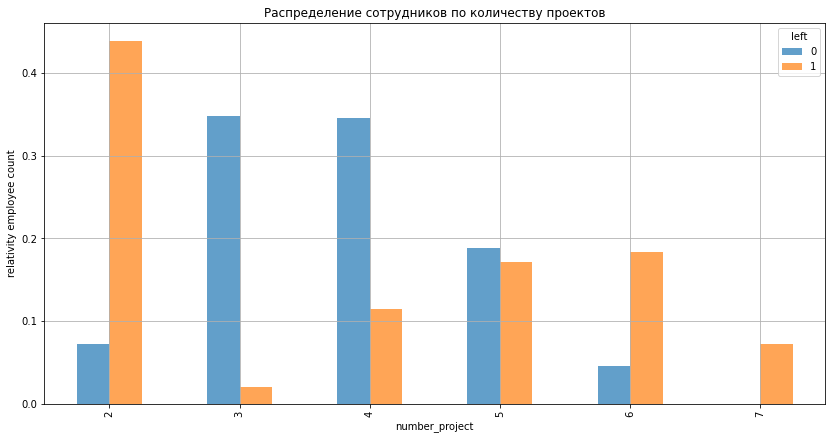

In [32]:
#подробная картина
left_count = df[df['left']=='1']['salary'].count()
stay_count = df[df['left']=='0']['salary'].count()

def plot_func(ser):
    #в функцию приходит сериес с одинаковым left, и индексами из датафрейма
    #определить к какой группе относится пришедший сериес можно так
    if df['left'].loc[ser.index[0]] == '1': group_count = left_count
    if df['left'].loc[ser.index[0]] == '0': group_count = stay_count 
    return(len(ser)/group_count)

df.pivot_table(index = 'number_project', columns = 'left', values = 'salary', aggfunc = plot_func).plot(
     kind = 'bar',alpha = 0.7, grid = True, ylabel = 'relativity employee count', 
    title = 'Распределение сотрудников по количеству проектов')

#Вывод: Около половины уволившихся имели 2 проекта, необходим дальнейший анализ этой категории
#       Распределение проектов у оставшихся сотрудников близко к нормальному, у более 60% сотрудников 3-4 проекта
#       У уволившихся, имеющих бодее 2 проектов различия небольшие, от 3 до 7 проектов.
#       Среди оставшихся нет сотрудников, у которых более 7 проектов, необходим дальнейшиий анализ данной категории

#TODO: сделать график в виде "количество сотрудников, у которых количество проектов меньше X"

In [33]:
#поделить на сумму по столбцу
new_pivot = df.pivot_table(index = 'number_project', columns = 'left', values = 'salary', aggfunc = 'count')
new_pivot

left,0,1
number_project,,
2,821,1567
3,3983,72
4,3956,409
5,2149,612
6,519,655
7,0,256


In [34]:
df['department'].value_counts().values

array([4140, 2720, 2229, 1227,  902,  858,  787,  767,  739,  630],
      dtype=int64)